In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

In [2]:
def firstDigit(number):
    digits = (int)(math.log10(number)) 
    number = (int)(number / pow(10, digits)) 
    return number
def graph(image_name,flag):
    
    img = cv2.imread(image_name,0)
    norm_img = np.zeros((800,800))
    final_img = cv2.normalize(img,  norm_img, 0, 255, cv2.NORM_MINMAX)
    cv2.imwrite('city_normalized.jpg', final_img)
    img = cv2.imread('./city_normalized.jpg',0)
    imf = np.float32(img)/255.0
    dst = cv2.dct(imf)
    img = np.uint8(dst)*255.0
    
    col = dst.reshape(dst.shape[0]*dst.shape[1],).tolist()
    length = len(col)
    
    
    dict_freq = {}
    for digit in range(1,10):
        dict_freq[str(digit)] = 0

    for value in col:
        if (type(value) is int or type(value) is float) and value>0:
    #         print(value)
            f_digit = firstDigit(value*1000000000000000000000000)
            dict_freq[str(f_digit)]+=1

    benford_dict = {}
    for digit in range(1,10):
        benford_dict[str(digit)] = math.log10(1+1/digit)
    freq_benf = np.array(list(benford_dict.values()))
    total_entries = 0
    
    for i in list(dict_freq.values()):
        total_entries+=i
    digits = list(dict_freq.keys())
    
    digits = list(dict_freq.keys())
    frequency = list(dict_freq.values())

    benford_freq = freq_benf * total_entries

    plt.bar(range(len(dict_freq)),frequency,tick_label=digits,color = 'silver')
    if flag==0:
        plt.plot(digits,frequency,label="Original Image Analysis",color='black',linestyle='dashed',linewidth=3,marker='o')
    else:
        plt.plot(digits,frequency,label="Modified Image Analysis",color='black',linestyle='dashed',linewidth=3,marker='o')
    plt.plot(digits,benford_freq,label="Actual Benford's Analysis",color='blue',linestyle='dashed',linewidth=3,marker='*')
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.legend(loc='best')
    plt.savefig('result.png', dpi=300, bbox_inches='tight')
    plt.show()

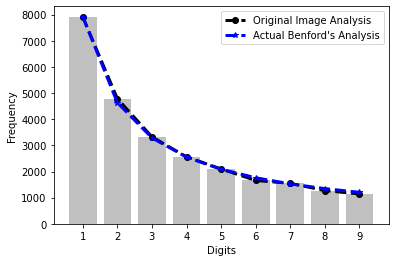

In [3]:
graph('./original.jpg',0)

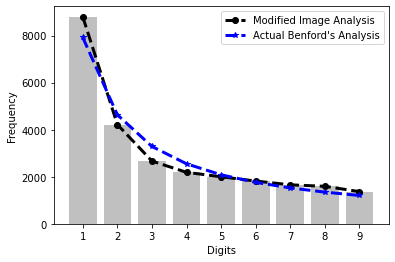

In [4]:
graph('./modified.jpg',1)